## Import Library 

In [37]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly
import plotly.express as px
import plotly.offline as po

## Reading Data from CSV

In [38]:
df = pd.read_csv('./world_population.csv')
df.dropna(inplace=True)
df

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


## Grafik Kepadatan Per 5 Tahun Tiap Benua

<Axes: xlabel='Continent'>

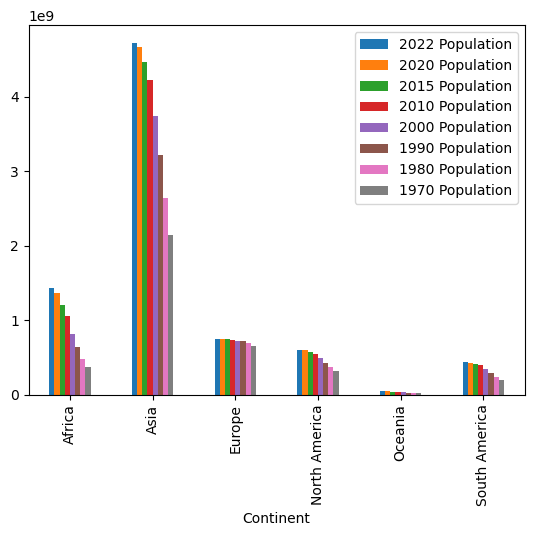

In [39]:
db = df.drop(columns=['Rank','Country/Territory','Capital','CCA3'])
db = db.groupby(['Continent']).sum()
db.drop(columns=['Area (km²)','Density (per km²)','Growth Rate','World Population Percentage'],inplace=True)
# sns.barplot(x=db[['2022 Population','2020 Population','2015 Population','2010 Population','2000 Population','1990 Population','1980 Population','1970 Population']])
db.plot.bar()

## Persentase Pie Chart Growth Rate Per Continent

/tmp/ipykernel_6444/524308189.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



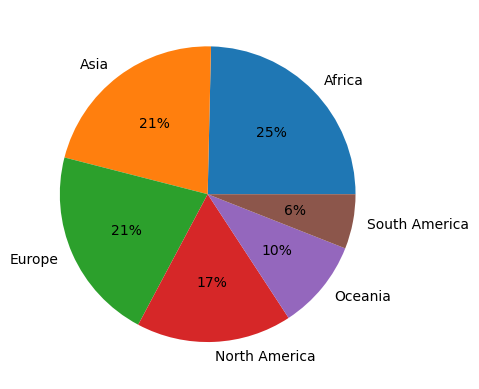

In [40]:
dp = df.groupby('Continent').sum()
plt.pie(dp['Growth Rate'],labels=['Africa','Asia','Europe','North America','Oceania','South America'],autopct='%.0f%%')
plt.show()

## Grafik Keterkaitan Antara Luas Wilayah Dengan Angka Pertumbuhan Di Semua Negara

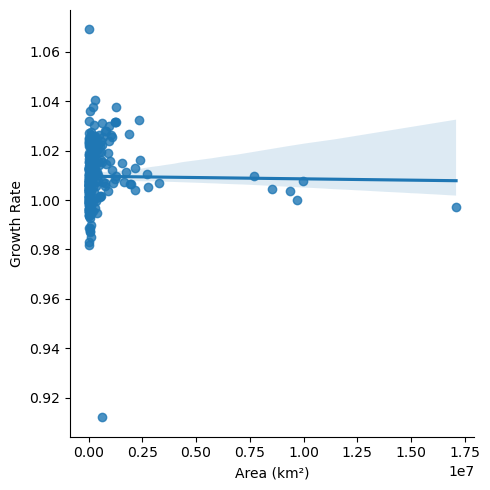

In [41]:
sns.lmplot(x='Area (km²)',y='Growth Rate',data=df)

## Choropleth Map 2022 Population

In [42]:
po.init_notebook_mode(connected = True)
wcm = px.choropleth(locations=df['CCA3'], locationmode='ISO-3',
                    color=df['2022 Population'], title='World Population 2022',)
wcm.show()